# Project 1
These exercises should be done on a computer using Python. 	Please submit a Jupyter-notebook, containing both your code and the report in the same file. Provide properly commented code.

**You will need an additional Python library for this project:** The library `autograd` will be used to compute the numerical Jacobian. You can install this with `pip install autograd`, `pip3 install autograd` or `conda install autograd` depending on your setup.

In [1]:
import autograd.numpy as np
from autograd import jacobian
import matplotlib.pyplot as plt
import random


## 1 - Fixed point methods
Consider the following functions:
$$g_1(x,y) = \log(x^2+2)+\log(y^2+2)\\ g_2(x,y)=\log(x^2+y^2+2)$$

1. Prove that $G(x,y) = (g_1(x,y), g_2(x,y))$ is a contraction. **Hint**: $\frac{2x}{x^2+1} \leq 1$

$$ \begin{align*} \|G(x_1,y_1)-G(x_2,y_2)\|_\infty \leq \|G(x_1,y_1)\|_\infty + \|G(x_2,y_2)\|_\infty &= \|{{0.5log(x^2+2)} + 0.5log(y^2+2)\|_\infty}\atop{0.5log(x^2+y^2+2)} \\
&= we
\end{align*}$$

2. Write a python function `fixpoint` for fixpoint iteration that takes a numpy array `x`, a function `F` between numpy arrays of the same size, and tries to do fixpoint iteration on it to find the fixpoint. Choose a sensible heuristic for when to stop iterating. 
 - Plot the values of $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$ for each iteration  $k=0,1,\dots, K-1$ where $K$ is the total number of iterations (choose $K$ large enough to make a detailed plot). Use a semi-logarithmic scale on the y-axis (`semilogy` in matplotlib).
3. Use your python code to find the fixpoint of $G$

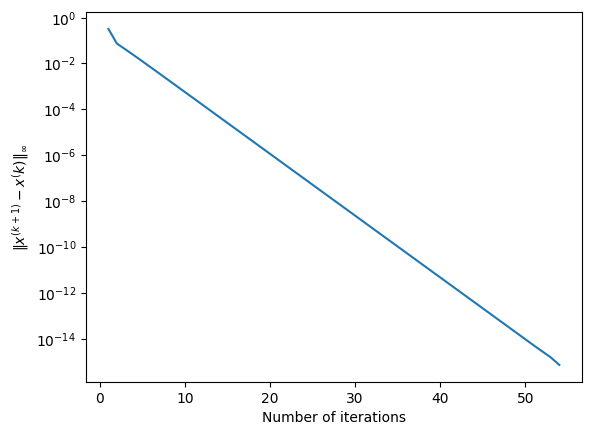

G has a fixed point at [0.96618534 0.59508504]


In [2]:
from numpy.linalg import norm

def fixpoint(x0,f,tolerance,K):
    xvalues=[x0]
    for i in range(K):
        xvalues.append(f(xvalues[-1]))
        if np.linalg.norm(xvalues[-1]-xvalues[-2],np.inf)<tolerance: #Stops iterating when within a tolerance of a fixpoint 
            break 
        else:
            continue

    #Plots the values of  
    xaxis=[i for i in range(1,len(xvalues))]
    yaxis=[norm(xvalues[i+1]-xvalues[i]) for i in range(len(xvalues)-1)]
    plt.semilogy(xaxis, yaxis)
    plt.xlabel("Number of iterations")
    plt.ylabel(r"$ \| x^{(k+1)}-x^(k) \|_{\infty} $")
    plt.show()
    print(f"G has a fixed point at {xvalues[-1]}")
    return 

def g1(x0):
    return 0.5*(np.log(x0[0]**2 +2) + np.log(x0[1]**2 +2))
def g2(x0):
        return 0.5*(np.log(x0[0]**2 + x0[1]**2 +2))
def G(x0):
    return np.array([g1(x0), g2(x0)])

x0=np.array([1.0,1.0]) #Initial vector

fixpoint(x0, G, tolerance=10**-15, K=10000)



# 2 - Newton's method

In this exercise, we will make use of the `autograd` package. As we have done at the start of this noteobook, when using this package you must `import` Numpy using `autograd.numpy`. We use the `jacobian` function, which approximates the jacobian of functions between Numpy arrays. See the following example.

$$ F(x_1, x_2) = (x_1 + x_2, x_1x_2)$$

In [3]:
from autograd.numpy.linalg import inv

def F_0(x):
    return np.array([x[0] + x[1], x[1]*x[0]])

# Computing the numerical Jacobian
DF = jacobian(F_0)
# Testing our function
#x = np.array([3.0, 1.0])
#print(DF(x))


1. Using the package `autograd` for automatic differentiation to compute Jacobians, create a function `newton` which implements Newton's method for systems of nonlinear equations $F(\mathbf{x})=0$.
- Plot the values of $\|\mathbf{x}^{k+1}-\mathbf{x}^k\|_{\infty}$ and $\|F(\mathbf{x}_k)\|_{\infty}$ for each iteration  $k=0,1,\dots, K-1$ where $K$ is the total number of iterations (choose $K$ large enough to make a detailed plot). Use a semi-logarithmic scale on the y-axis (`semilogy` in matplotlib).

In [4]:
# Your Newton method implementation


def newton(x0, f, tolerance, K):
    JF = jacobian(f)                     
    x = np.copy(x0)                       # Makes a local copy of x0 to avoid changing the global variable x0
    xnorms = []                           # List for || x_(k+1) - x_(k) ||
    fnorms = []                           # List for || f(x_k) || 
    fnorms.append(norm(f(x),np.inf))       # Adds || f(x0)||_\infty to fnorms

    for k in range(K):                     # Iterates x
        xcopy = np.copy(x)                  # Holds a copy of x_k for calculating ||x_(k+1) - x_k||
        x -= inv(JF(x)) @ f(x)           # Iterates x
        xnorms.append(norm(x-xcopy,np.inf))  # Computes ||x_(k+1) - x_k|| and stores it in in xnorms 
        fnorms.append(norm(f(x),np.inf))     # Computes ||f(x_k)|| and sotres it in fnorms
        if fnorms[-1]<tolerance:
            break

    #Plots
     
    plt.plot(range(1,len(xnorms)+1),xnorms, label = r"$||x^{(k+1)} - x^{(k)}||_{\infty}$")
    plt.plot(range(len(fnorms)), fnorms, label = r"$||f(x_{k})||_{\infty}$")
    plt.xlabel("Number of iterations")
    plt.legend(loc="best")
    plt.yscale("log")
    plt.show()

    print(f"Newton method returned {x}")
    return x


2. Use newtons method to solve the fixpoint equation $G$ from the fixpoint section. Pick a sensible $F$ that lets you solve the fixpoint equation.
3. Compare the plots generated by the fixpoint iteration and newtons method, discuss the differences/similarities.

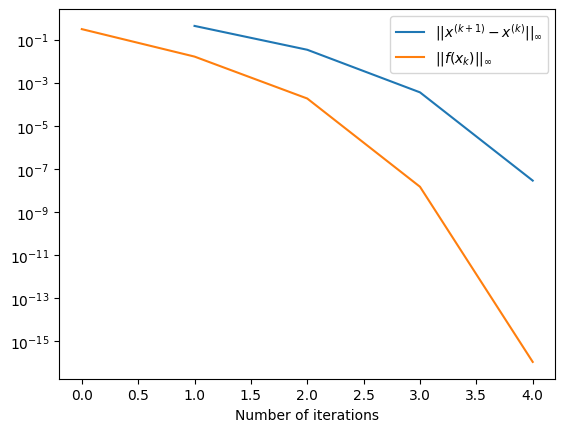

Newton method returned [0.96618534 0.59508504]


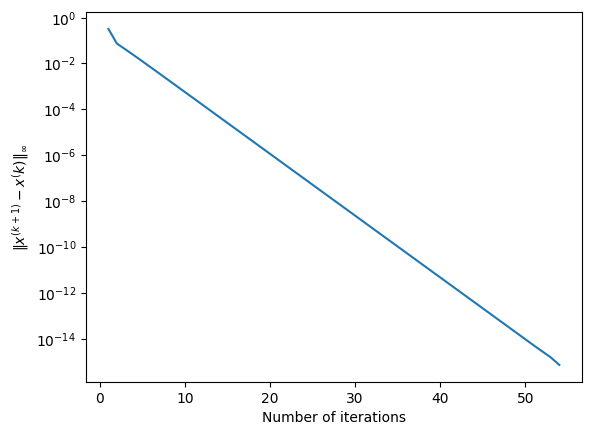

G has a fixed point at [0.96618534 0.59508504]


In [5]:
# Your code here

def G2(x):
    return G(x)-x

newton(x0,G2,10**-15,100)

fixpoint(x0,G,10**-15,100)


From these two graphs we see that Newtons method finds the fixpoint of G after 4 iterations while the original fixpoint iteration needs over 50 iterations, hence the Newtons method converges much faster. Also, we can see that Newtons method converges quadratically whereas the first method converges linearly.  

4. Use newtons method to make a function `mroot` that calculates a $n$-th root of a matrix $A$. That is, a function that solves $X^n = A$ given $A$ and $n$.

- Write unit tests to confirm numerically that your implementation is correct.

**Hint**. Can you reinterpret the function $F(X) = X^n - A$ as a function between arrays? 

In [6]:
# Your code here
from numpy.linalg import matrix_power 

#Deletes A from variables before running code to avoid errors. 
try:
    del A
except:
    pass

def newton2(x0, f, K): #Newton without the graphs
    JF = jacobian(f)                     
    x = np.copy(x0)                       

    for k in range(K):
        x -= inv(JF(x)) @ f(x)
        if norm(f(x),np.inf)<10**-15: #Stops iterating when close to a root
            break
    return x


def mroot(A, n):
    dim_A = len(A)          
    x = np.ones(dim_A**2)   #Initial vector

    # Tried using built in fuctions like reshape and flatten first but kept getting errors when running Newtons method on F, in particular, Newtons kept failing because some Jacobian would be singular. 
    # It's not clear to me why, but recreating these functions using the list p doesn't lead to singular Jacobians
    # even though both the built in functions and these custom functions seem to return exactly the same arrays.  
    def array_to_matrix(x):                
        p = [[] for i in range(dim_A)]        
        for i in range(int(dim_A)):
            for j in range(int(dim_A)):
                p[i].append(x[i*dim_A+j])
        return np.matrix(p)

    def matrix_to_array(X):
        p=[]
        for i in range(int(dim_A)):
            for j in range(int(dim_A)):
                p.append(X[i,j])
        return np.array(p)
    
    def F(x0):
        x=array_to_matrix(x0)
        x=matrix_power(x,n)
        return matrix_to_array(x-A)

    return array_to_matrix(newton2(x,F,1000))
    


#Simple unit test
def simpletest():
    A=np.array([[1,2],[3,4]])
    root = mroot(A,3)
    print(f"### Simple test ### \n\nA: \n {A} \n\nmroot returned X=\n {root} \n\nX^3-A = 0 \n {np.allclose(matrix_power(root,3),A)}\n\n")

simpletest()

def dounittest():
    d=random.randint(2,5) #A is a dxd square matrix
    m=random.randint(2,5) #The degree of the root
    A= np.random.randint(-2*d,2*d,(d,d))  #Creates a dxd matrix A with random integers between -2*d and 2*d.
    root = mroot(A,m)
    if np.allclose(matrix_power(root,m),A) == True: # If root is indeed an m-th root of A, then it is printed. Otherwise return 1/0 causes an error which is caught in the while loop below resulting in a new unit test with a new random matrix A. 
        print(f"### Unit test: find an {m}-th root of a random {d}x{d} matrix A ### \n\nA: \n {A} \n")
        print(f"mroot returned X= \n {root}\n")
        print(f"X^{m}-A=0 \n{np.allclose(matrix_power(root,m),A)}")
    else:
        return 1/0 

while True: #Repeats unit test until it is a success.
    try:
        dounittest()
        break
    except:            
        pass


### Simple test ### 

A: 
 [[1 2]
 [3 4]] 

mroot returned X=
 [[-0.12914891  0.86021571]
 [ 1.29032357  1.16117466]] 

X^3-A = 0 
 True


### Unit test: find an 2-th root of a random 3x3 matrix A ### 

A: 
 [[-2 -3  3]
 [-1  2 -2]
 [-2 -2 -3]] 

mroot returned X= 
 [[ 1.16566901  2.06665338  1.09116052]
 [-0.5742411  -2.01091069  0.74620614]
 [-1.99056591 -1.1484822   0.17038606]]

X^2-A=0 
True


5. Think of a good way of verifying numerically that the convergence of the Newton iteration is quadratic. 
- Your answer is the code that does the verification, the evidence it produces and an explanation of why it is evidence for quadratic convergence.

**Hint**. You should consider a problem for which you know the solution or alternatively generate a reference solution (i.e. an approximation with *very* high accuracy). Use the definition of quadratic convergence. You can also compute the jacobian exactly (by hand) to eliminate the error from that part of the process.

For a differentiable function $F$ with $F(\xi) = 0$, Taylor's theorem tells us that 

$$ \begin{align*}
F(a) &= F(\xi) + F'(\xi)(a-\xi) + h_1(a)(a-\xi), \quad \lim_{a\to \xi} h_1(a) = 0\\
&\approx F'(\xi)(a-\xi) \end{align*}
$$.


If $F'(\xi) \neq 0 $, we can substitute in $a_1=x_{k+1}$ and $a_2 = x_{k}$ 
we get $$ \frac{||F(a_1)||_\infty}{||F(a_2)||_\infty} = \frac{||F(x_{k+1})||_\infty}{||F(x_k)||_\infty} \approx \frac{f'(\xi)\cdot||x_{k+1}-\xi ||_\infty}{f'(\xi)\cdot||x_k - \xi ||_\infty}=\frac{||x_{k+1}-\xi ||_\infty}{||x_k - \xi ||_\infty}$$

$$ \Rightarrow \frac{||F(x_{k+1})||_\infty}{||F(x_k)||^2_\infty} \approx \frac{||x_{k+1}-\xi ||_\infty}{||x_k - \xi ||^2_\infty} $$

We use this approximation to verify that the convergence of the Newton iteration on the function $G2$ from problem 1 is quadratic

0.5009042872798896


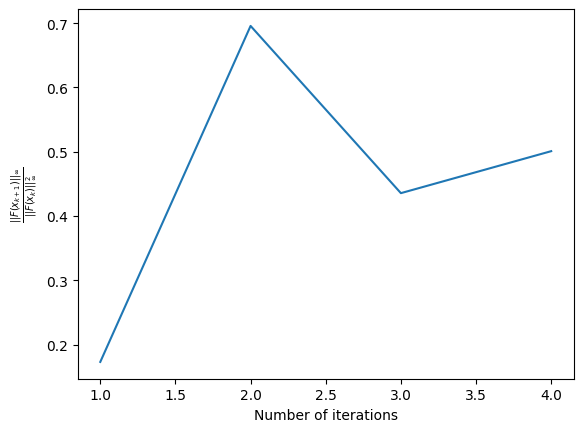

In [7]:
# Your Code Here
def test_convergence(x0, f, K): #Newton without the graphs
    JF = jacobian(f)                     
    x = np.copy(x0)                       
    fvalues=[f(x)] 
    for k in range(K): #Iterates x
        x -= inv(JF(x)) @ f(x)
        fvalues.append(f(x))  
        if norm(f(x),np.inf)<10**-10: #Stops iterating when f(x_k) is very close to 0
            break
    ydata=[(norm(fvalues[i+1],np.inf)/norm(fvalues[i], np.inf)**2) for i in range(len(fvalues)-1)]   # || f(x_{k+1})||_infty / || f(x_k) ||^2_infty for k = 0,1,...,n-1, where n is the amount of iterations.
    xdata=[i for i in range(1,len(ydata)+1)]

    plt.plot(xdata,ydata)
    plt.xlabel("Number of iterations")
    plt.ylabel(r"$\frac{||F(x_{k+1})||_\infty}{||F(x_k)||^2_\infty}$")
    print(ydata[-1])
    return 

test_convergence(x0,G2,4)

# 3 Linear systems

We solve the linear system 
	$$
	A \mathbf{x}  = \mathbf{b},
	$$
    in the following.
For convenience, we introduce the following notation:

- $A_d$ the diagonal part of $A$,
- $A_l$ is the strictly lower-triangular part of $A$,
- $A_u$ is the strictly upper-triangular part of $A$,

with this notation, $A = A_d + A_l + A_u$.

We will now approximate the solution of this linear system using three different iterative methods of the type 
	$$
		M \mathbf{x}^{(k+1)} =\mathbf{b} -N \mathbf{x}^{(k)},
	$$
	where $A = M + N$ with $\det(M)\ne0$. These methods are aslo known as splitting methods and  each choice of $M$ (and $N=A-M$) determines a different method.  We will use the following three iterative methods to calculate approximate solutions to $\mathbf{u}$:

a) Jacobi ($M = A_d$).

b) Forward Gauss-Seidel ($M = A_d+A_l$).

c) Successive over relaxation ($M = A_d+\omega A_l$, where you can choose the value of $\omega$).

1. Create a function that implements the above iterative method. This function should take as input the matrix `A` and `M` such that you can use this function for all three methods above, and outputs the solution to the linear system `u`.
2. Generate a large invertible matrix $A$ by multiplying an upper triangular and lower triangular matrix. Use this to make a linear system of equations and solve it with the above iterative methods. For each of the three methods plot $\|A\mathbf{x}^{k}-\mathbf{b}\|_{\infty}$ for each iteration $k$.

Jacobi returned the solution x=
[ 5.31153496e-04 -8.23164915e-04  3.06212871e-04 -2.75058283e-04
  6.47895332e-05 -5.20642358e-04 -3.48026796e-04  9.13920325e-04
  2.40009220e-04  5.71066615e-04  4.29139229e-04  7.84675501e-04]
GS returned the solution x=
[ 5.31153496e-04 -8.23164915e-04  3.06212871e-04 -2.75058283e-04
  6.47895332e-05 -5.20642358e-04 -3.48026796e-04  9.13920325e-04
  2.40009220e-04  5.71066615e-04  4.29139229e-04  7.84675501e-04]
Relaxed returned the solution x=
[ 5.31153496e-04 -8.23164915e-04  3.06212871e-04 -2.75058283e-04
  6.47895332e-05 -5.20642358e-04 -3.48026796e-04  9.13920325e-04
  2.40009220e-04  5.71066615e-04  4.29139229e-04  7.84675501e-04]


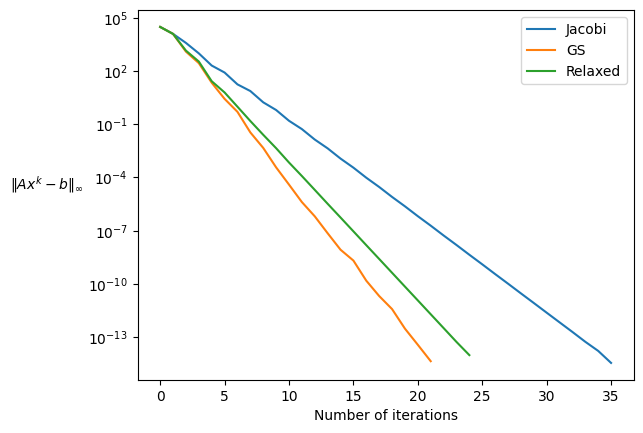

In [91]:

def generate_large_A():
    n = random.randint(10,20) # number of rows/columns in square matrix A
    M = np.random.uniform(-50,50,(n,n))  # Generates a random square matrix M from which we extract upper and lower triangular matrices U and L.
    U = np.triu(M)
    L = np.tril(M)
    A = U @ L

    # Here we make sure A is strictly diagonally dominant by adding values to the diagonal if necessary, since otherwise the splitting methods might not work.
    for i in range(n):
        if abs(A[i,i])<=(sum(abs(A[i]))-abs(A[i,i])):
            if np.sign(A[i,i])==0:
                A[i,i] += sum(abs(A[i])) + 1
            else:
                A[i,i] += np.sign(A[i,i])*sum(abs(A[i]))
        else:
            continue
    return A


A = generate_large_A()
Ad = np.diag(np.diag(A))
Al = np.tril(A,k=-1)
b= np.ones(len(A))*6

def SplitSolve(A,M, labeltext):
    N=A-M
    invM=inv(M)
    x=np.ones(len(A[0])) #Initial vector
    ydata=[norm(A@x-b,np.inf)]     # || Ax^k - b ||_\infty
    
    for i in range(1000): #Iterate x
        x=invM@(b-N@x)
        ydata.append(norm(A@x-b,np.inf))
        if ydata[-1]<10**-14:   
            break
                               
    plt.semilogy([i for i in range(len(ydata))], ydata, label=labeltext)
    plt.xlabel("Number of iterations")
    plt.ylabel(r"$\|Ax^k-b\|_\infty$", rotation="horizontal", labelpad=30)
    plt.legend()
    print(f"{labeltext} returned the solution x=\n{x}")
    return 

SplitSolve(A,M=Ad, labeltext="Jacobi")
SplitSolve(A,M=Ad+Al, labeltext="GS")
SplitSolve(A,M=Ad+0.9*Al, labeltext="Relaxed")

            





